In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
df_F0=pd.read_csv('b30hz0.csv')

In [ ]:
df_F0

,a1,a2,a3,a4
0,2.350390,1.454870,-1.667080,-2.055610
1,2.452970,1.400100,-2.825100,0.984487
2,-0.241284,-0.267390,0.793540,0.605862
3,1.130270,-0.890918,0.696969,0.613068
4,-1.296140,0.980479,-1.130560,-0.346971
...,...,...,...,...
88315,1.658100,-6.309490,0.821900,-3.357700
88316,2.253370,-3.105760,2.791110,-3.016840
88317,2.625840,3.814600,1.330690,-0.759645
88318,5.358220,6.105210,-1.367490,0.891057


In [ ]:
df_H0=pd.read_csv('h30hz0.csv')

In [ ]:
df_H0

,a1,a2,a3,a4
0,4.636710,0.516978,-3.205940,1.822410
1,1.992800,4.184660,-2.740610,2.804360
2,-3.764110,0.997335,-1.303090,1.836680
3,-4.558710,6.104330,-1.720690,1.723110
4,0.575382,0.170980,-0.497967,-1.328950
...,...,...,...,...
88827,2.809130,-3.421020,2.817560,5.418570
88828,11.952700,1.738450,4.215360,5.602480
88829,6.530280,-3.127760,-2.620330,-3.159950
88830,-8.614460,5.420640,-6.559170,-0.519373


In [ ]:
load_col=[int(0/100) for j in range(len(df_F0))]
label_col = [int(1) for j in range(len(df_F0))]
df_F0['load']=load_col
df_F0['fault']=label_col
df_F0

,a1,a2,a3,a4,load,fault
0,2.350390,1.454870,-1.667080,-2.055610,0,1
1,2.452970,1.400100,-2.825100,0.984487,0,1
2,-0.241284,-0.267390,0.793540,0.605862,0,1
3,1.130270,-0.890918,0.696969,0.613068,0,1
4,-1.296140,0.980479,-1.130560,-0.346971,0,1
...,...,...,...,...,...,...
88315,1.658100,-6.309490,0.821900,-3.357700,0,1
88316,2.253370,-3.105760,2.791110,-3.016840,0,1
88317,2.625840,3.814600,1.330690,-0.759645,0,1
88318,5.358220,6.105210,-1.367490,0.891057,0,1


In [ ]:
label_col = [int(0) for j in range(len(df_H0))]
load_col=[int(0/100) for j in range(len(df_H0))]
df_H0['load']=load_col
df_H0['fault']=label_col
df_H0

,a1,a2,a3,a4,load,fault
0,4.636710,0.516978,-3.205940,1.822410,0,0
1,1.992800,4.184660,-2.740610,2.804360,0,0
2,-3.764110,0.997335,-1.303090,1.836680,0,0
3,-4.558710,6.104330,-1.720690,1.723110,0,0
4,0.575382,0.170980,-0.497967,-1.328950,0,0
...,...,...,...,...,...,...
88827,2.809130,-3.421020,2.817560,5.418570,0,0
88828,11.952700,1.738450,4.215360,5.602480,0,0
88829,6.530280,-3.127760,-2.620330,-3.159950,0,0
88830,-8.614460,5.420640,-6.559170,-0.519373,0,0


In [ ]:
df_0load = pd.concat([df_F0,df_H0],axis=0)

In [ ]:
df_0load['fault']=1-df_0load['fault']

In [ ]:
df_0load

,a1,a2,a3,a4,load,fault
0,2.350390,1.454870,-1.667080,-2.055610,0,0
1,2.452970,1.400100,-2.825100,0.984487,0,0
2,-0.241284,-0.267390,0.793540,0.605862,0,0
3,1.130270,-0.890918,0.696969,0.613068,0,0
4,-1.296140,0.980479,-1.130560,-0.346971,0,0
...,...,...,...,...,...,...
88827,2.809130,-3.421020,2.817560,5.418570,0,1
88828,11.952700,1.738450,4.215360,5.602480,0,1
88829,6.530280,-3.127760,-2.620330,-3.159950,0,1
88830,-8.614460,5.420640,-6.559170,-0.519373,0,1


In [ ]:
df_0load['tot']=df_0load['a1']*df_0load['a1']+df_0load['a2']*df_0load['a2']+df_0load['a3']*df_0load['a3']+df_0load['a4']*df_0load['a4']

In [ ]:
df_0load.describe()

,a1,a2,a3,a4,load,fault,tot
count,177152.000000,177152.000000,177152.000000,177152.000000,177152.0,177152.000000,177152.000000
mean,-0.011448,0.007617,-0.018023,-0.006159,0.0,0.501445,61.656876
std,4.901857,4.041203,3.177481,3.346755,0.0,0.499999,92.557032
min,-38.414400,-29.159600,-21.264100,-23.450000,0.0,0.000000,0.029749
25%,-2.393790,-2.007557,-1.652553,-1.789515,0.0,0.000000,12.621618
50%,0.009984,0.057149,-0.026416,0.005622,0.0,1.000000,30.606729
75%,2.368275,2.138662,1.644583,1.791345,0.0,1.000000,73.022422
max,39.267700,29.214600,18.821600,25.977600,0.0,1.000000,2571.782926


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6831a6b90>,
      dtype=object)

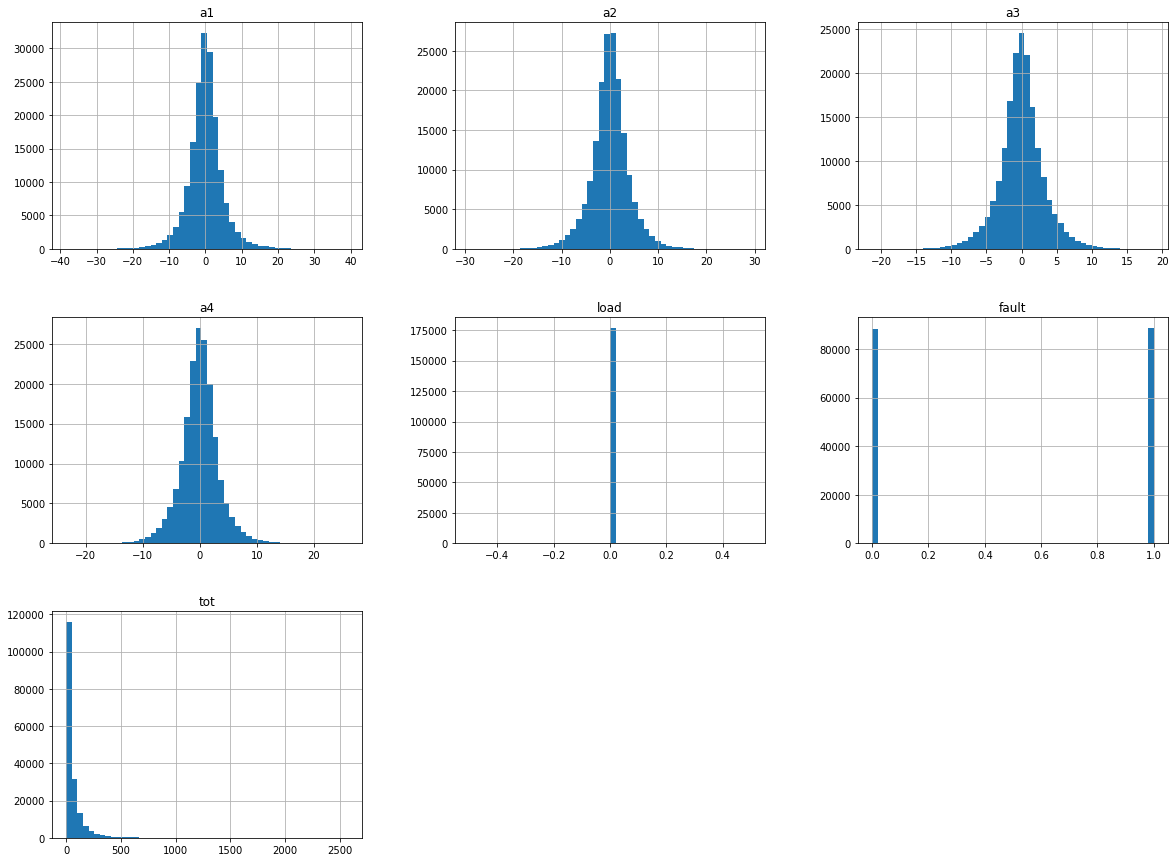

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df_0load.hist(bins=50, figsize=(20,15))

In [ ]:

def split_train_test(data):
    np.random.seed(42)
    shuffled=np.random.permutation(len(data))
    test_set_size=5000
    train_set_size=20000
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[len(data)-train_set_size:]
    return data.iloc[train_indices] , data.iloc[test_indices]

In [ ]:
train_set,test_set=split_train_test(df_0load)

In [ ]:
test_set

,a1,a2,a3,a4,load,fault,tot
71012,-2.073530,0.704134,-4.407370,2.271090,0,0,29.378091
74821,-4.444930,5.640360,3.166890,3.443950,0,1,73.461048
11519,1.003400,-0.491268,-4.071490,1.401480,0,1,19.789333
71948,6.966630,0.388186,-5.801700,1.503850,0,1,84.605910
59639,3.110250,1.938760,-3.533020,0.768689,0,1,26.505558
...,...,...,...,...,...,...,...
512,2.621600,7.214120,-3.458080,1.348230,0,0,72.692355
62743,-4.268720,1.459630,2.966730,-1.589490,0,1,31.680456
37390,-1.767040,0.038393,-0.983613,2.153870,0,0,8.730555
53794,-3.190600,3.005460,-4.014700,-2.145090,0,0,39.931945


In [ ]:
train_set

,a1,a2,a3,a4,load,fault,tot
49758,-0.105494,-0.236351,-4.712170,5.05173,0,1,47.791513
85261,-1.098050,1.558160,-4.040120,2.47817,0,0,26.097473
54004,15.898500,-3.751190,0.848292,2.47315,0,1,273.669799
83748,4.230280,-4.521020,-2.281340,-2.98626,0,0,52.457152
65572,-3.591400,-0.838603,1.672460,2.82621,0,0,24.385994
...,...,...,...,...,...,...,...
31559,-3.062570,1.573180,-1.167130,0.46060,0,1,13.428575
15374,-0.620537,0.881969,-0.690425,0.46585,0,1,1.856638
43612,0.454921,1.694600,2.151110,1.98004,0,1,11.626455
58547,0.553853,1.912240,2.248840,-0.00407,0,1,9.020713


In [ ]:
test_set['fault'].value_counts()

1    2516
0    2484
Name: fault, dtype: int64

In [ ]:
train_set['fault'].value_counts()

1    10055
0     9945
Name: fault, dtype: int64

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
print(list(train_set.keys()))

['a1', 'a2', 'a3', 'a4', 'load', 'fault', 'tot']


In [ ]:
X_train = train_set['tot'].values.reshape(-1, 1)
y_train = train_set['fault'].values.reshape(-1, 1)
X_test = train_set['tot'].values.reshape(-1, 1)
y_test = train_set['fault'].values.reshape(-1, 1)

In [ ]:

clf = LogisticRegression()


In [ ]:
clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
e=clf.predict(([[10]]))

In [ ]:
print(e)

[0]


In [ ]:
# y_pred = gridsearch.predict(X_test)
# test_score = accuracy_score(y_test, y_pred)
# print('Accuracy Score on test data set:', test_score)

In [ ]:
x_new=np.linspace(0,2500,3000).reshape(-1,1)
y_prob=clf.predict_proba(x_new)

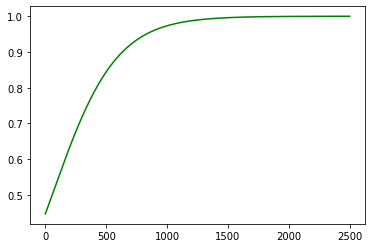

In [ ]:
plt.plot(x_new,y_prob[:,1],"g-",label='faulty')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
a=cross_val_score(clf,X_train,y_train,cv=3,scoring="accuracy")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
a.mean()

0.5380002677033865

In [ ]:
X_train_2 = train_set['a2'].values.reshape(-1, 1)
y_train_2 = train_set['fault'].values.reshape(-1, 1)
X_test_2 = train_set['a2'].values.reshape(-1, 1)
y_test_2 = train_set['fault'].values.reshape(-1, 1)

In [ ]:
clf_2 = LogisticRegression()

In [ ]:
clf_2.fit(X_train_2,y_train_2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
from sklearn.model_selection import cross_val_score
a_2=cross_val_score(clf,X_test_2,y_test_2,cv=3,scoring="accuracy")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
a_2.mean()

0.5086499350400017

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf,X_test,y_test,cv=3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_train_pred

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_train,y_train_pred)##predicted data

array([[7139, 2806],
       [6434, 3621]])

In [ ]:
confusion_matrix(y_train,y_train)##actual data(for prefect prediction)

array([[ 9945,     0],
       [    0, 10055]])

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score ##Evaluting Precison,recall and F1_score

In [ ]:
precision_score(y_train,y_train_pred)

0.5634043877392252

In [ ]:
recall_score(y_train,y_train_pred)

0.3601193436101442

In [ ]:
f1_score(y_train,y_train_pred)

0.4393884237349836

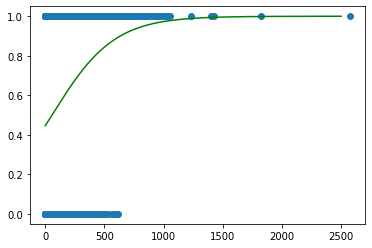

In [ ]:
x_new=np.linspace(0,2500,3000).reshape(-1,1)
y_prob=clf.predict_proba(x_new)
plt.scatter(X_test,y_test)
plt.plot(x_new,y_prob[:,1],"g-",label='faulty')
plt.show()